In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'/content/Updated_Billionaires_Statistics.xlsx')

status
D                       5734000
U                       5157400
E                        554700
N                        344200
Split Family Fortune     315800
R                        100700
Name: finalWorth, dtype: int64 
-----------------

status
D                       1223
U                        855
E                        268
N                        150
Split Family Fortune      79
R                         65
Name: count, dtype: int64


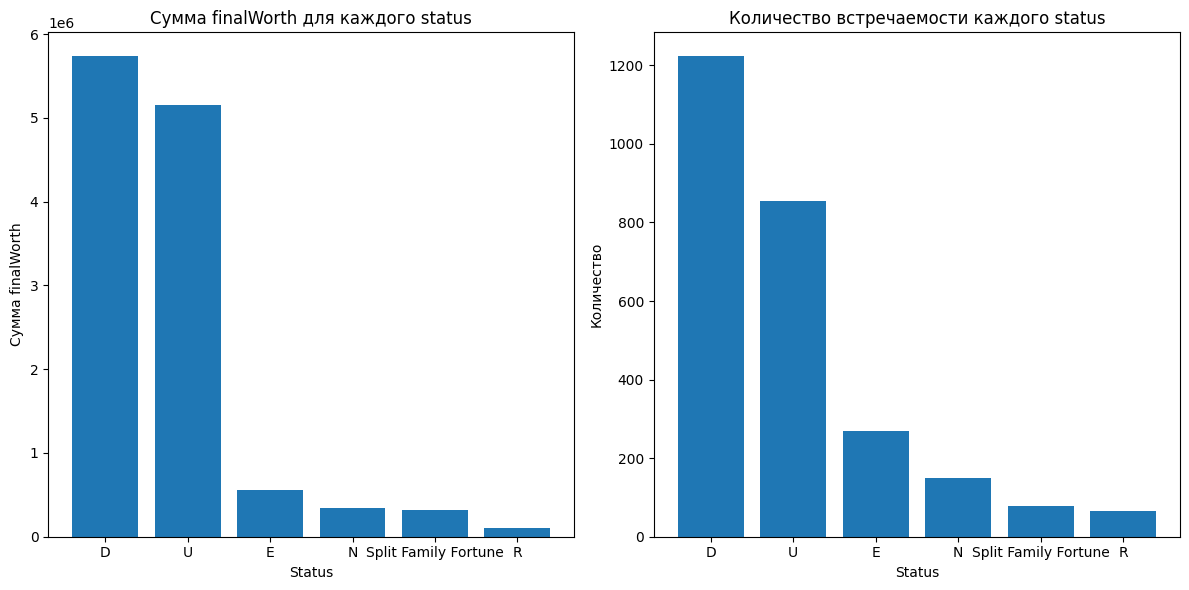

In [ ]:
summed_values = df.groupby('status')['finalWorth'].sum()
summed_values = summed_values.sort_values(ascending=False)
print(summed_values,'\n-----------------\n')
# 2. Вторая гистограмма: количество встречаемости каждого значения в status
count_values = df['status'].value_counts()
print(count_values)
# Построение графиков
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Гистограмма 1: Суммы
axs[0].bar(summed_values.index, summed_values.values)
axs[0].set_title('Сумма finalWorth для каждого status')
axs[0].set_xlabel('Status')
axs[0].set_ylabel('Сумма finalWorth')

# Гистограмма 2: Количество встречаемости
axs[1].bar(count_values.index, count_values.values)
axs[1].set_title('Количество встречаемости каждого status')
axs[1].set_xlabel('Status')
axs[1].set_ylabel('Количество')

plt.tight_layout()
plt.show()

country
United States               754
China                       523
India                       157
Germany                     102
United Kingdom               82
Russia                       79
Switzerland                  78
Hong Kong                    68
Italy                        55
Singapore                    46
Brazil                       44
Australia                    43
Taiwan                       43
Canada                       42
Japan                        38
France                       35
South Korea                  29
Thailand                     28
Israel                       26
Sweden                       26
Turkey                       25
Spain                        25
Indonesia                    25
United Arab Emirates         17
Monaco                       17
Philippines                  14
Mexico                       13
Austria                      11
Malaysia                     11
Netherlands                  10
Norway                        9


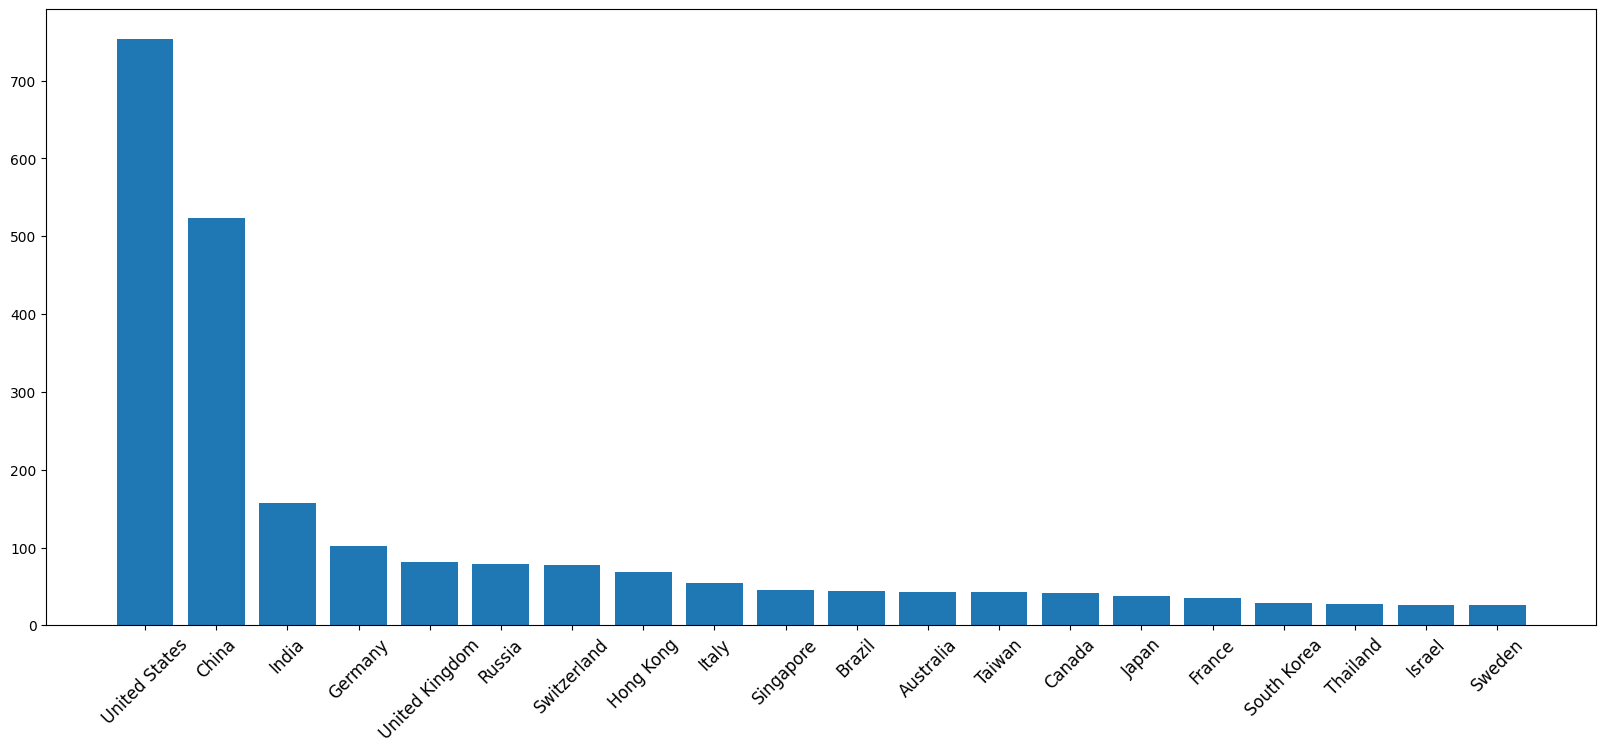

In [16]:
country_values = df['country'].value_counts()
country_values = country_values.sort_values(ascending=False)
fig, axs = plt.subplots(figsize=(20, 8))
axs.bar(country_values.index[0:20], country_values.values[0:20])
plt.xticks(rotation=45, fontsize=12)
print(country_values.to_string())
plt.show()

<BarContainer object of 18 artists>

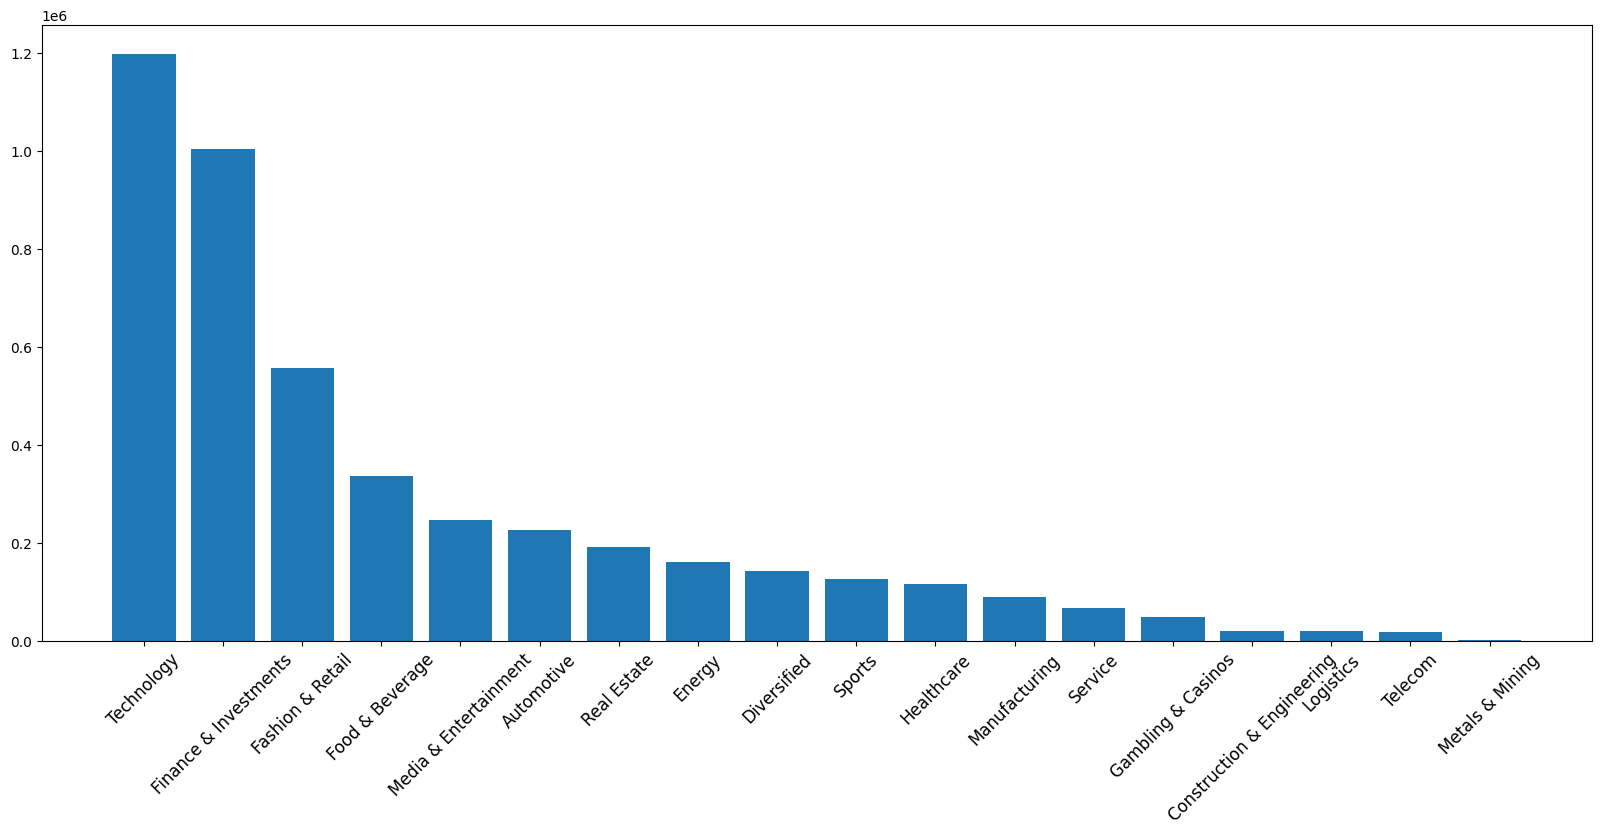

In [8]:
fig, axs = plt.subplots(figsize=(20, 8))
df_USA = df[df['country'] == 'United States']
df_USA_status = df_USA.groupby('industries')['finalWorth'].sum()
df_USA_status = df_USA_status.sort_values(ascending=False)
plt.xticks(rotation=45, fontsize=12)
axs.bar(df_USA_status.index, df_USA_status.values)

<BarContainer object of 2 artists>

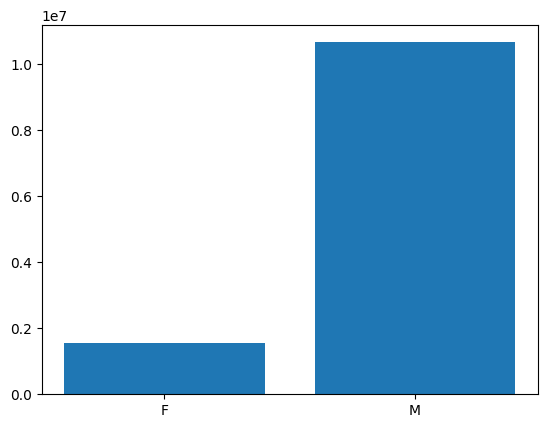

In [9]:
df_gender = df.groupby('gender')['finalWorth'].sum()
plt.bar(df_gender.index, df_gender.values)

<BarContainer object of 40 artists>

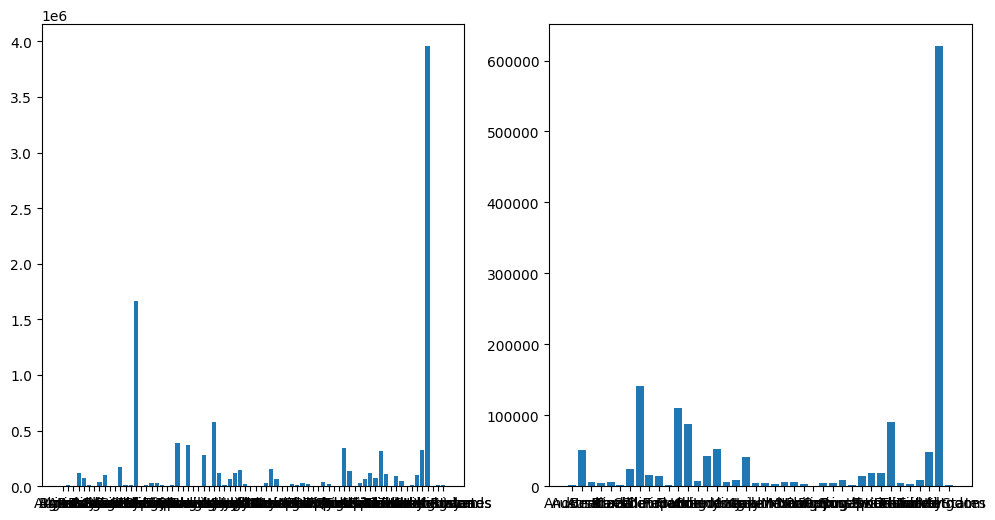

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
df_M = df[df['gender'] == 'M']
df_M = df_M.groupby('country')['finalWorth'].sum()
df_G = df[df['gender'] == 'F']
df_G = df_G.groupby('country')['finalWorth'].sum()
axs[0].bar(df_M.index, df_M.values)
axs[1].bar(df_G.index, df_G.values)

<BarContainer object of 29 artists>

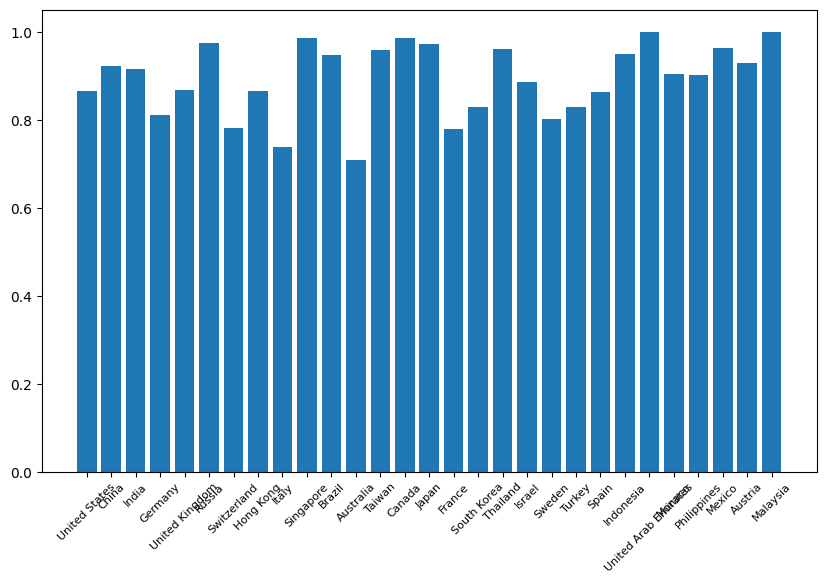

In [33]:
N_i = []
N_gm = []
fig, axes = plt.subplots(figsize=(10, 6))
for i in country_values.index:
  if country_values[i] >10:
    if i in df_G.index:
      N_i.append(i)
      N_gm.append(df_M[i]/(df_M[i]+df_G[i]))
    else:
      N_i.append(i)
      N_gm.append(1)

plt.xticks(rotation=45, fontsize=8)
plt.bar(N_i, N_gm)